# K Means Clustering

K-means is a popular clustering algorithm used in machine learning and data mining. It partitions a dataset into K clusters by iteratively assigning each data point to the cluster with the nearest centroid, then updating the centroids based on the mean of the data points in each cluster.

[StatQuest: K-means clustering](https://youtu.be/4b5d3muPQmA?si=yDNOvAWrxNEUNl88)

![](https://media.geeksforgeeks.org/wp-content/uploads/20190812011831/Screenshot-2019-08-12-at-1.09.42-AM.png)

## Intuition

K-means seeks to partition a dataset into K clusters by minimizing the distance between data points and the centroids of their assigned clusters. It starts by randomly placing K centroids in the data space. Then, it iterates by assigning each data point to the nearest centroid and updating the centroids based on the mean of the data points in each cluster. This process continues until centroids stabilize or a maximum number of iterations is reached. The algorithm aims to find centroids that represent the centers of the clusters, resulting in a partitioning that minimizes intra-cluster variance and maximizes inter-cluster variance.

**Cost Function:**
$$J = \sum_{i=1}^{n} \sum_{j=1}^{K} ||x^{(i)} - \mu_j||^2$$

Where:
- $J$ is the cost function
- $m$ is the number of data points
- $K$ is the number of clusters
- $x^{(i)}$ is the $i^{th}$ data point
- $\mu_j$ is the centroid of the $j^{th}$ cluster
- $|| \cdot ||^2$ denotes the squared Euclidean distance

## Algorithm

1. Initialize K centroids randomly within the data space.
2. Assign each data point to the nearest centroid, forming K clusters.
3. Update each centroid by computing the mean of the data points assigned to it.
4. Repeat steps 2 and 3 until convergence criteria are met:  
    1. No data points change clusters.
    2. Centroids stabilize (i.e., their positions stop changing).
    3. Maximum number of iterations is reached.
5. Output the final centroids and cluster assignments.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

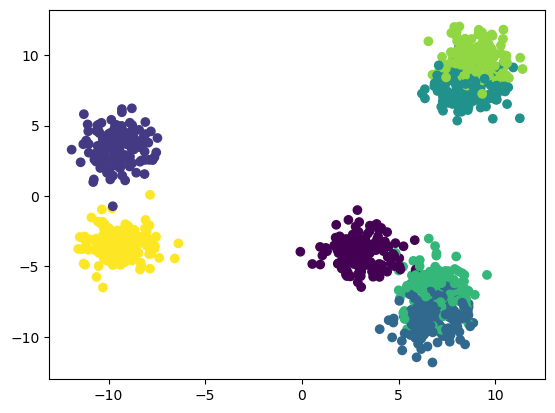

In [76]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=1000,n_features=25,
                 centers=7,random_state=2002)

plt.scatter(X[:,0],X[:,1],c=y);

In [64]:
from sklearn.cluster import KMeans

wcss = [0]

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(X)
    wcss.append(km.inertia_)

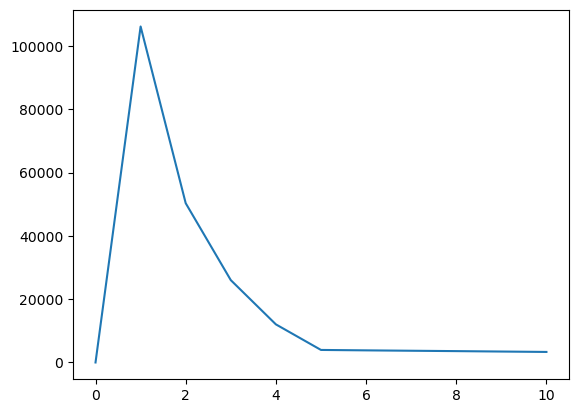

In [65]:
plt.plot(wcss);

In [66]:
wcss

[0,
 106196.57564097765,
 50341.69096477761,
 26027.245963191657,
 12046.114663839757,
 3961.8557281473586,
 3830.319086104455,
 3707.897306282751,
 3590.412316344748,
 3457.137979313535,
 3330.9511441149516]

In [67]:
from sklearn.metrics import silhouette_score

sil_scores = [0,0]

for i in range(2,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(X)
    sil_scores.append(silhouette_score(X,km.labels_))

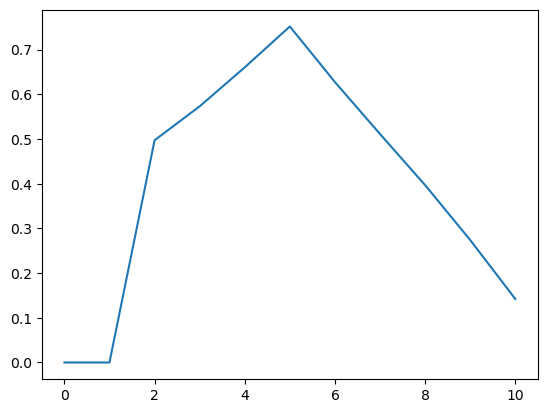

In [68]:
plt.plot(sil_scores);

In [69]:
sil_scores

[0,
 0,
 0.4971960562736817,
 0.5731329711288994,
 0.6603844878333396,
 0.7518012940154756,
 0.6273979143889038,
 0.5111490042822777,
 0.3968034826293295,
 0.2739998642968225,
 0.14210346134999388]